In [12]:
import pandas as pd
import numpy as np

import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
task_01 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-repin/5_task_1.csv')

In [8]:
task_02 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-repin/5_task_2.csv')

In [3]:
task_01.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [7]:
task_01.shape

(30000, 3)

In [9]:
task_02.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [30]:
task_02.group.unique()

array(['test', 'control'], dtype=object)

In [10]:
task_02.shape

(100000, 4)

In [16]:
a = task_01.query('group == "A"').events
b = task_01.query('group == "B"').events
c = task_01.query('group == "C"').events

In [17]:
ss.levene(a,b,c)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [19]:
ss.f_oneway(a,b,c)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [21]:
print(pairwise_tukeyhsd(task_01.events, task_01.group))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


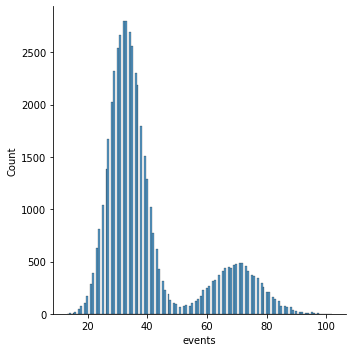

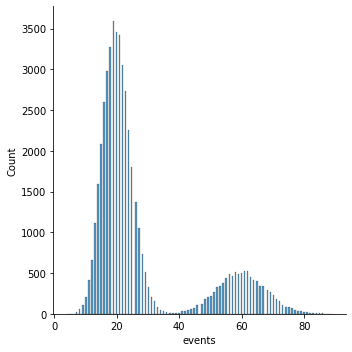

In [31]:
sns.displot(task_02.query('group =="test"').events)
sns.displot(task_02.query('group =="control"').events)


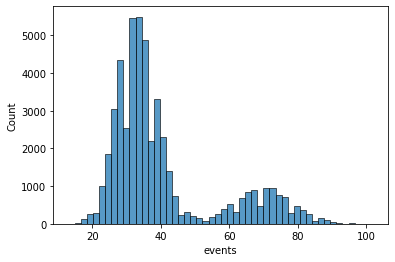

In [33]:
sns.histplot(task_02.query('group =="test"').events, bins=50)


In [38]:
task_02.query('segment =="high" & group == "control"').events.describe().round(2)

count    10000.00
mean        59.97
std          7.81
min         31.00
25%         55.00
50%         60.00
75%         65.00
max         89.00
Name: events, dtype: float64

In [40]:
task_02.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,test/high
1,96723,test,high,71.0,test/high
2,68719,test,high,80.0,test/high
3,50399,test,high,80.0,test/high
4,95613,test,high,78.0,test/high


In [46]:
model = smf.ols(formula = 'events ~ segment + group + segment:group', data = task_02).fit()
aov_table = anova_lm(model, typ=2).round(2)
print(aov_table)

                    sum_sq       df          F  PR(>F)
segment        23624796.65      1.0  689756.38     0.0
group           3837195.41      1.0  112031.86     0.0
segment:group     36642.44      1.0    1069.82     0.0
Residual        3424955.89  99996.0        NaN     NaN


In [39]:
task_02['combination'] = task_02.group + '/' + task_02.segment

In [49]:
print(pairwise_tukeyhsd(task_02.events, groups = task_02.combination))

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2   meandiff p-adj  lower    upper   reject
----------------------------------------------------------------
control/high control/low -39.9392 0.001 -40.1073 -39.7711   True
control/high   test/high   9.9677 0.001   9.7551  10.1803   True
control/high    test/low -26.9449 0.001  -27.113 -26.7768   True
 control/low   test/high  49.9069 0.001  49.7388   50.075   True
 control/low    test/low  12.9944 0.001   12.888  13.1007   True
   test/high    test/low -36.9126 0.001 -37.0807 -36.7445   True
----------------------------------------------------------------


<function matplotlib.pyplot.show(*args, **kw)>

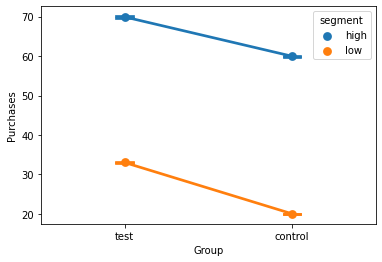

In [53]:
sns.pointplot(x = 'group', y = 'events', hue = 'segment', data = task_02, capsize = .1)
plt.xlabel('Group')
plt.ylabel('Purchases')
plt.show

Text(0, 0.5, 'Purchases')

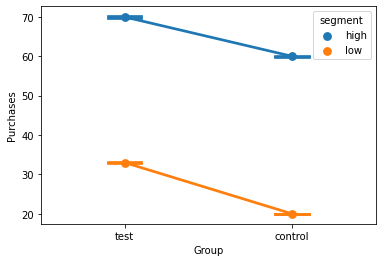

In [56]:
sns.pointplot(x = 'group', y = 'events', hue = 'segment', data = task_02, capsize = .2)
plt.xlabel('Group')
plt.ylabel('Purchases')
